In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ggplot as gg
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('02-enriched-data.csv')

In [3]:
df.head()

,LSOA_code,Region,LA_Code,LA_Name,year,mode,travel_time,nearest,urban_rural,area_square_km,...,road_LA_minor_length_km,road_LA_principal_length_km,road_LA_total_length_km,road_LA_trunk_length_km,bus_LA_vehicle_km_travelled,schools_all_LA,schools_nursery_LA,schools_primary_LA,schools_private_LA,schools_secondary_LA
0,E01000001,London,E09000001,City of London,2014,car,6.753080,employment_centre,Urban major conurbation,0.1298,...,44.3,12.85,57.2,0.0,14.730303,5,0,1,4,0
1,E01000001,London,E09000001,City of London,2014,cycle,6.610821,employment_centre,Urban major conurbation,0.1298,...,44.3,12.85,57.2,0.0,14.730303,5,0,1,4,0
2,E01000001,London,E09000001,City of London,2014,public transport,3.648643,employment_centre,Urban major conurbation,0.1298,...,44.3,12.85,57.2,0.0,14.730303,5,0,1,4,0
3,E01000001,London,E09000001,City of London,2015,car,6.153411,employment_centre,Urban major conurbation,0.1298,...,44.2,12.90,57.1,0.0,14.696970,5,0,1,4,0
4,E01000001,London,E09000001,City of London,2015,cycle,6.501751,employment_centre,Urban major conurbation,0.1298,...,44.2,12.90,57.1,0.0,14.696970,5,0,1,4,0


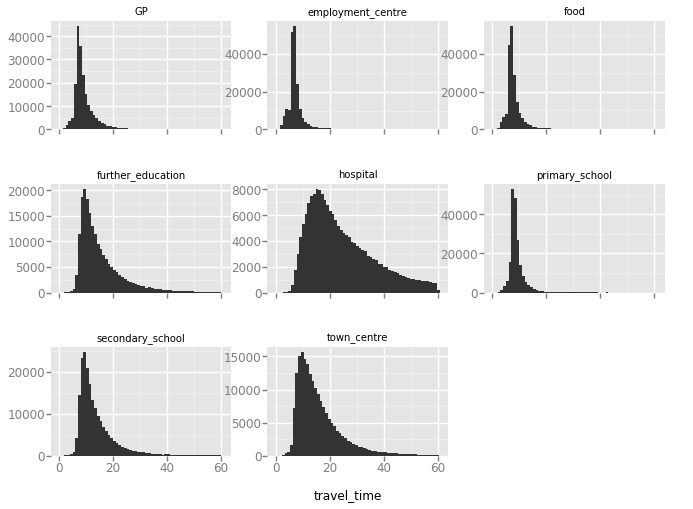

<ggplot: (-9223372036570983487)>

In [4]:
df_plot = df[df.travel_time < 60]
gg.ggplot(gg.aes(x='travel_time'), data=df_plot, ) +\
    gg.geom_histogram(binwidth=1) +\
    gg.facet_wrap('nearest', scales='free_y')

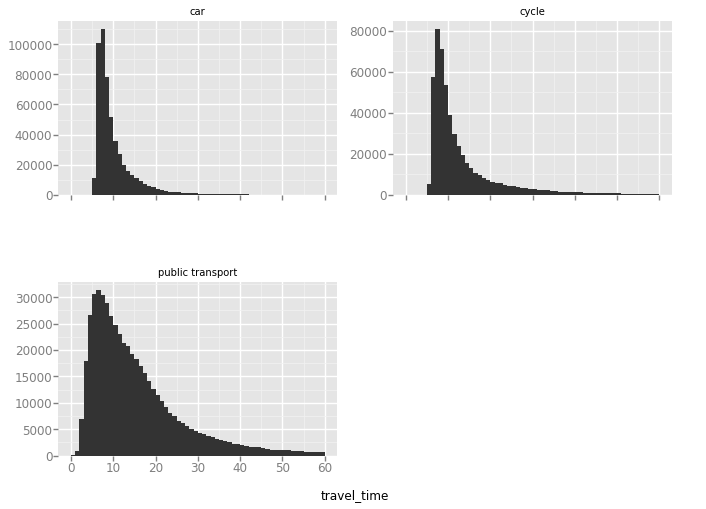

<ggplot: (-9223372036570983494)>

In [5]:
gg.ggplot(gg.aes(x='travel_time'), data=df_plot, ) +\
    gg.geom_histogram(binwidth=1) +\
    gg.facet_wrap('mode', scales='free_y')

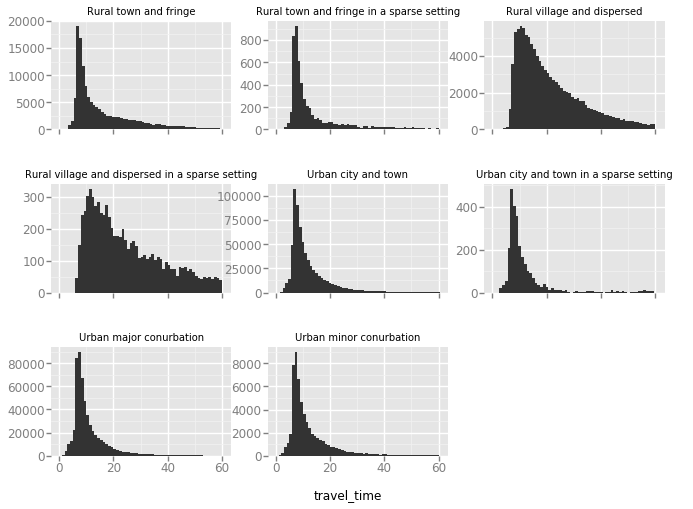

<ggplot: (285228580)>

In [6]:
gg.ggplot(gg.aes(x='travel_time'), data=df_plot, ) +\
    gg.geom_histogram(binwidth=1) +\
    gg.facet_wrap('urban_rural', scales='free_y')

## What are the outlier large travel times (schools)

In [7]:
df_school = df[df.nearest.apply(lambda x:'school' in x)]
outliers = df_school[df_school.travel_time > 60]

In [8]:
outliers.urban_rural.value_counts()

Rural village and dispersed                        356
Rural village and dispersed in a sparse setting    158
Rural town and fringe                               50
Rural town and fringe in a sparse setting            4
Urban major conurbation                              2
Urban city and town                                  2
Name: urban_rural, dtype: int64

In [9]:
outliers.year.value_counts()

2015    325
2014    247
Name: year, dtype: int64

In [12]:
outliers['mode'].value_counts()

public transport    496
cycle                71
car                   5
Name: mode, dtype: int64

In [13]:
outliers.nearest.value_counts()

secondary_school    562
primary_school       10
Name: nearest, dtype: int64

Rural places and public transport dominate the long travel times.